Lista 6

Zadanie 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
n = 1000
phi = 0.2
sigma = np.sqrt(0.4)

In [40]:
def ma1_sample(n, sigma, theta):
    z = np.random.normal(0, sigma, n+1)
    x = np.zeros(n)
    for i in range(1,n+1):
        x[i-1] = z[i] + theta * z[i-1]
    return x

In [41]:
def generate_ar1(n, sigma, phi):
    z = np.random.normal(0, sigma, n)
    x = np.zeros(n)
    for i in range(1, n+1):
        x[i] = x[i-1] * phi + z[i]
    return x

In [62]:
def autokowariancja(h, x):
    n = len(x)
    mean_x = np.mean(x)
    return 1/n * np.sum((x[:n-abs(h)] - mean_x) * (x[abs(h):] - mean_x))

In [83]:
sample = ma1_sample(n, sigma, phi)

In [84]:
def ar1_acvf(phi, sigma, h):
    return sigma**2 * phi ** (abs(h)) / (1 - phi**2)

In [85]:
hs = np.arange(1,11,1)

In [86]:
autokow_emp,autokow_teo = [], []
for h in hs:
    autokow_emp.append(autokowariancja(h, sample))
    autokow_teo.append(ar1_acvf(phi, sigma, h))

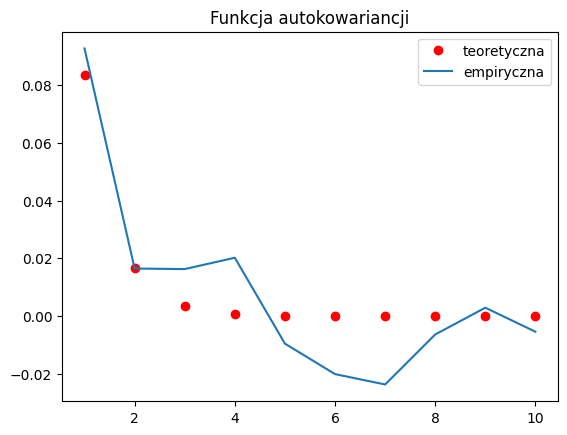

In [87]:
plt.plot(hs, autokow_teo, "ro", label="teoretyczna")
plt.plot(hs, autokow_emp, label="empiryczna")
plt.title("Funkcja autokowariancji")
plt.legend(loc="best")
plt.show()